In [53]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2HDM with $Z_2$ symmetry

In [54]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [55]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [56]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[-0.8057021317637938,
  0.9874681818778708,
  0.6273534572996647,
  -0.8057021317637938],
 [4.524763908223118, 3.5014611396246504, 2.728665005054136, 4.524763908223118],
 [4.332721602503348,
  1.8863111745550931,
  1.0181650505836575,
  4.332721602503348],
 [0.8249655231978306,
  -0.927694264475317,
  0.046648302484555426,
  -0.14937704376204186],
 [0.24566738116551523,
  -0.7193730812295982,
  0.48557632350591406,
  -0.959282023569997],
 [3.8630784877251596,
  -2.9058586051312743,
  0.3125371417876244,
  0.6446827408062612],
 [0.6617998972496588,
  3.20474652751518,
  3.6733198860362304,
  0.1932265387286085],
 [1.7852439562881939,
  2.0476571682641387,
  2.904106868451568,
  0.9287942561007645],
 [4.476323949887446,
  -0.534588363243027,
  4.328070343953494,
  -0.3863347573090756],
 [3.208124824667502, 4.570683840356319, 2.962218365504061, 3.208124824667502],
 [2.8826037847463724,
  -0.4296630328769826,
  1.8969163462011056,
  0.5560244056682841],
 [1.7778774971619615,
  4.563906892

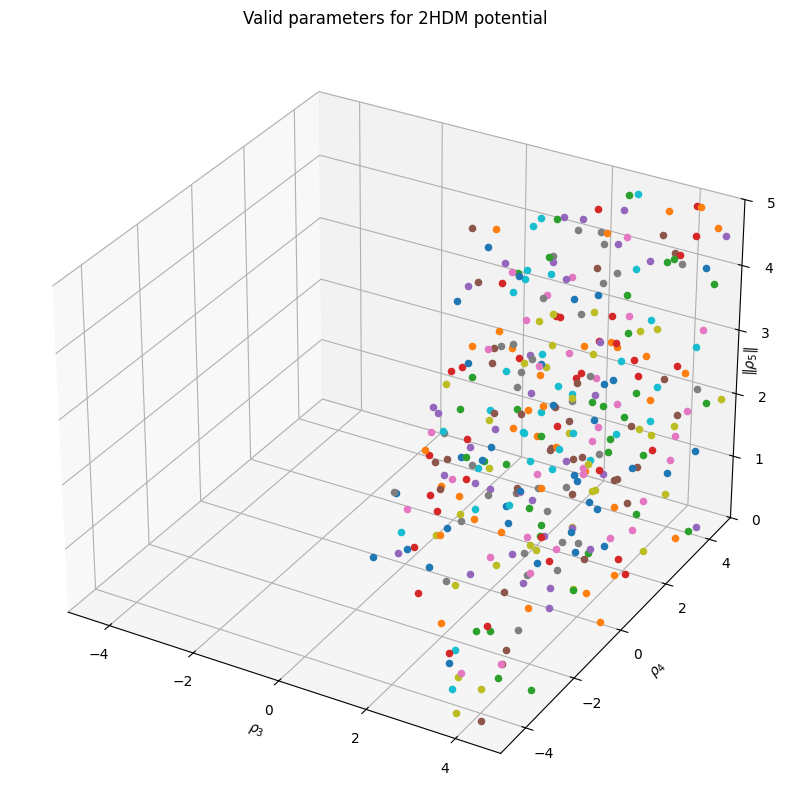

In [57]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

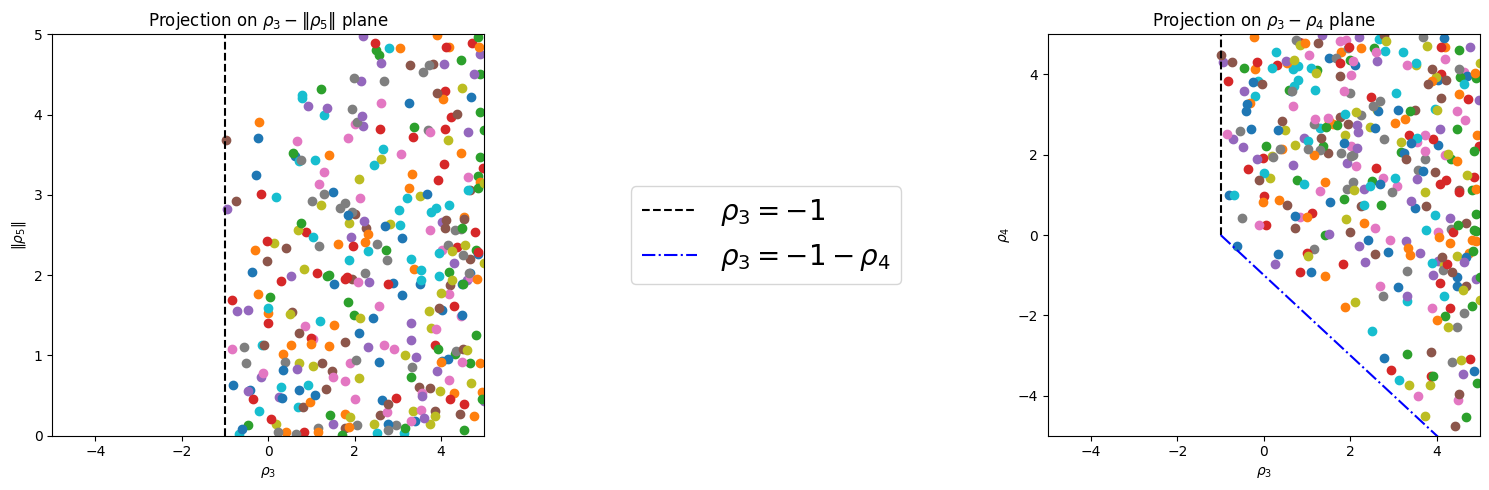

In [58]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [59]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [60]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [61]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [62]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [63]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,4*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [64]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[4.893454412190101,
  -2.341719004015399,
  0.29640443408708195,
  3.042411987615719,
  0.8626454700476072,
  1.883779511469703,
  1.4577841911716356,
  3.407911525682465,
  0.8593897943631796],
 [3.7344813977651334,
  1.4706372921686173,
  1.690550585410312,
  4.799451139339062,
  2.8551200439081734,
  5.609188475768742,
  0.28524364132878843,
  3.7836461173743583,
  0.7531344493406893],
 [0.3988696383285193,
  3.942440245895858,
  0.056928573042123176,
  3.855868859415225,
  1.4052563765712922,
  5.66733745855995,
  1.9435569530118546,
  2.472633836755971,
  1.0913821096605325],
 [4.833992288121321,
  2.9935884354987943,
  0.06866217406854835,
  1.24219541557048,
  2.3275232748861523,
  4.824937491541918,
  2.161688775312906,
  5.293890164365176,
  1.214556812919159],
 [1.2730934713639108,
  3.2054792417286144,
  4.040624754149349,
  3.260519230521579,
  0.5161252603373401,
  4.312405552075043,
  0.9025554552690712,
  2.65312377674384,
  0.3903681959916572],
 [0.08041049857668181,
 

In [65]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [66]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [67]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [68]:
# Check!

# Reproduce Z_2-conserving 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
#
new_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),dim,10**(-5))
new_valid_values

[[-0.6556674212817128,
  1.9634940092387554,
  2.237896964742529,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.07650566729514985],
 [2.699261404025563,
  -0.2796553217823403,
  3.1755165932188403,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2524110790907832],
 [3.9072380099384425,
  -4.27015590003419,
  0.4741296572672449,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16581280772444007],
 [0.5151399527990357,
  3.846547727140946,
  1.4761629172183433,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.5156380512830614],
 [2.653537519477263,
  1.9861294377293675,
  0.16062169645619684,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [4.135290380915137,
  3.7290128810507284,
  2.844328045488403,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [-0.5887967417158837,
  3.329139657974956,
  0.5729231295653814,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.41283543493600194],
 [0.4333527172500862,
  3.4746707860011625,
  0.5851831028676407,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.4339348360576563],
 [3.5466000000035045,
  3.6705377810444

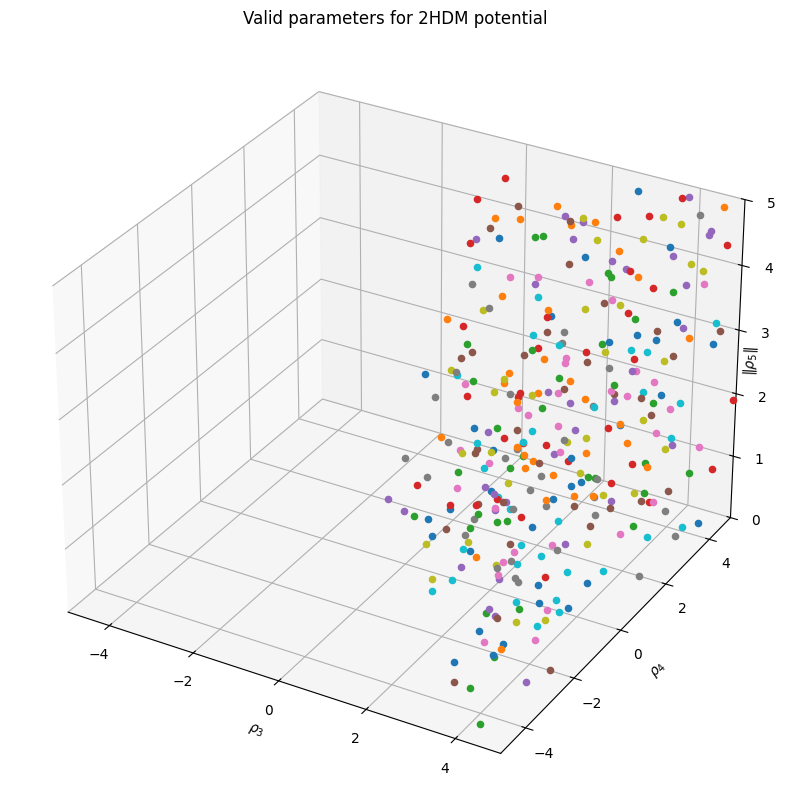

In [69]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

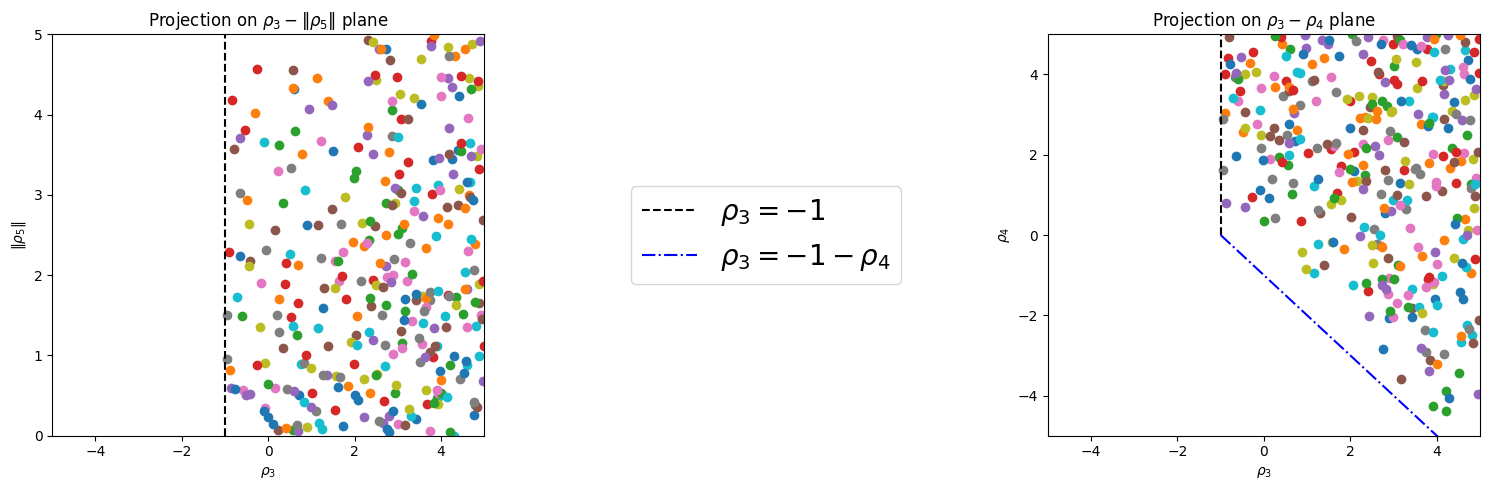

In [70]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [71]:
# Explore Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_valid_values

[[4.739487641975902,
  1.6047859021664106,
  2.7357293045128928,
  6.183352656190185,
  2.893748199562453,
  3.1344308842765174,
  1.6558234200510658,
  0.2029466354561816,
  1.0497831579888284],
 [4.527823567948186,
  0.8082163419330248,
  4.723460733869182,
  3.021789569297298,
  0.06140674038219884,
  5.388101305447126,
  0.7893225685661465,
  5.982317199678833,
  0.6647195516010689],
 [3.2928284076377565,
  2.854627672816715,
  3.375621768218488,
  3.0476226185303084,
  1.6449649422257018,
  5.97261971517608,
  2.3669273078262414,
  4.237989678892124,
  0.9896966438849784],
 [3.7300454931335487,
  3.6738205052995845,
  4.327099520970111,
  2.198032175200704,
  2.653729182211561,
  4.76298894081698,
  0.2833244251853162,
  2.816251223571853,
  0.8921517506039618],
 [1.3587044391474734,
  3.6620480278646887,
  1.5435158811274468,
  1.3649843989392607,
  1.7365868228601693,
  4.16394850146575,
  1.7480695608019636,
  2.961262378576486,
  1.1752882060867826],
 [2.701883140888077,
  4.0

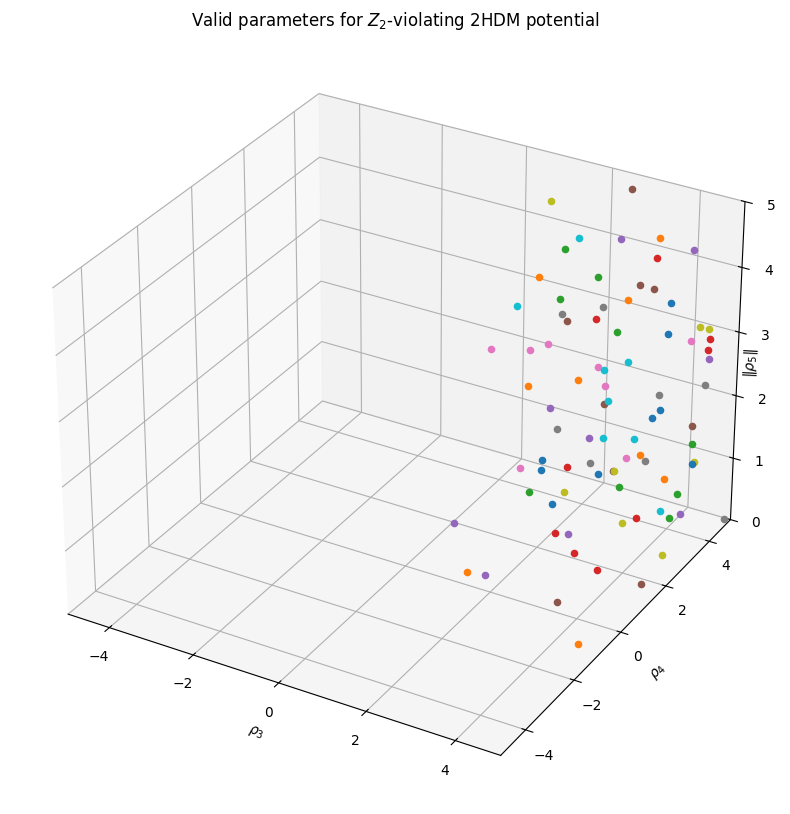

In [85]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    #
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for $Z_2$-violating 2HDM potential')

plt.show()

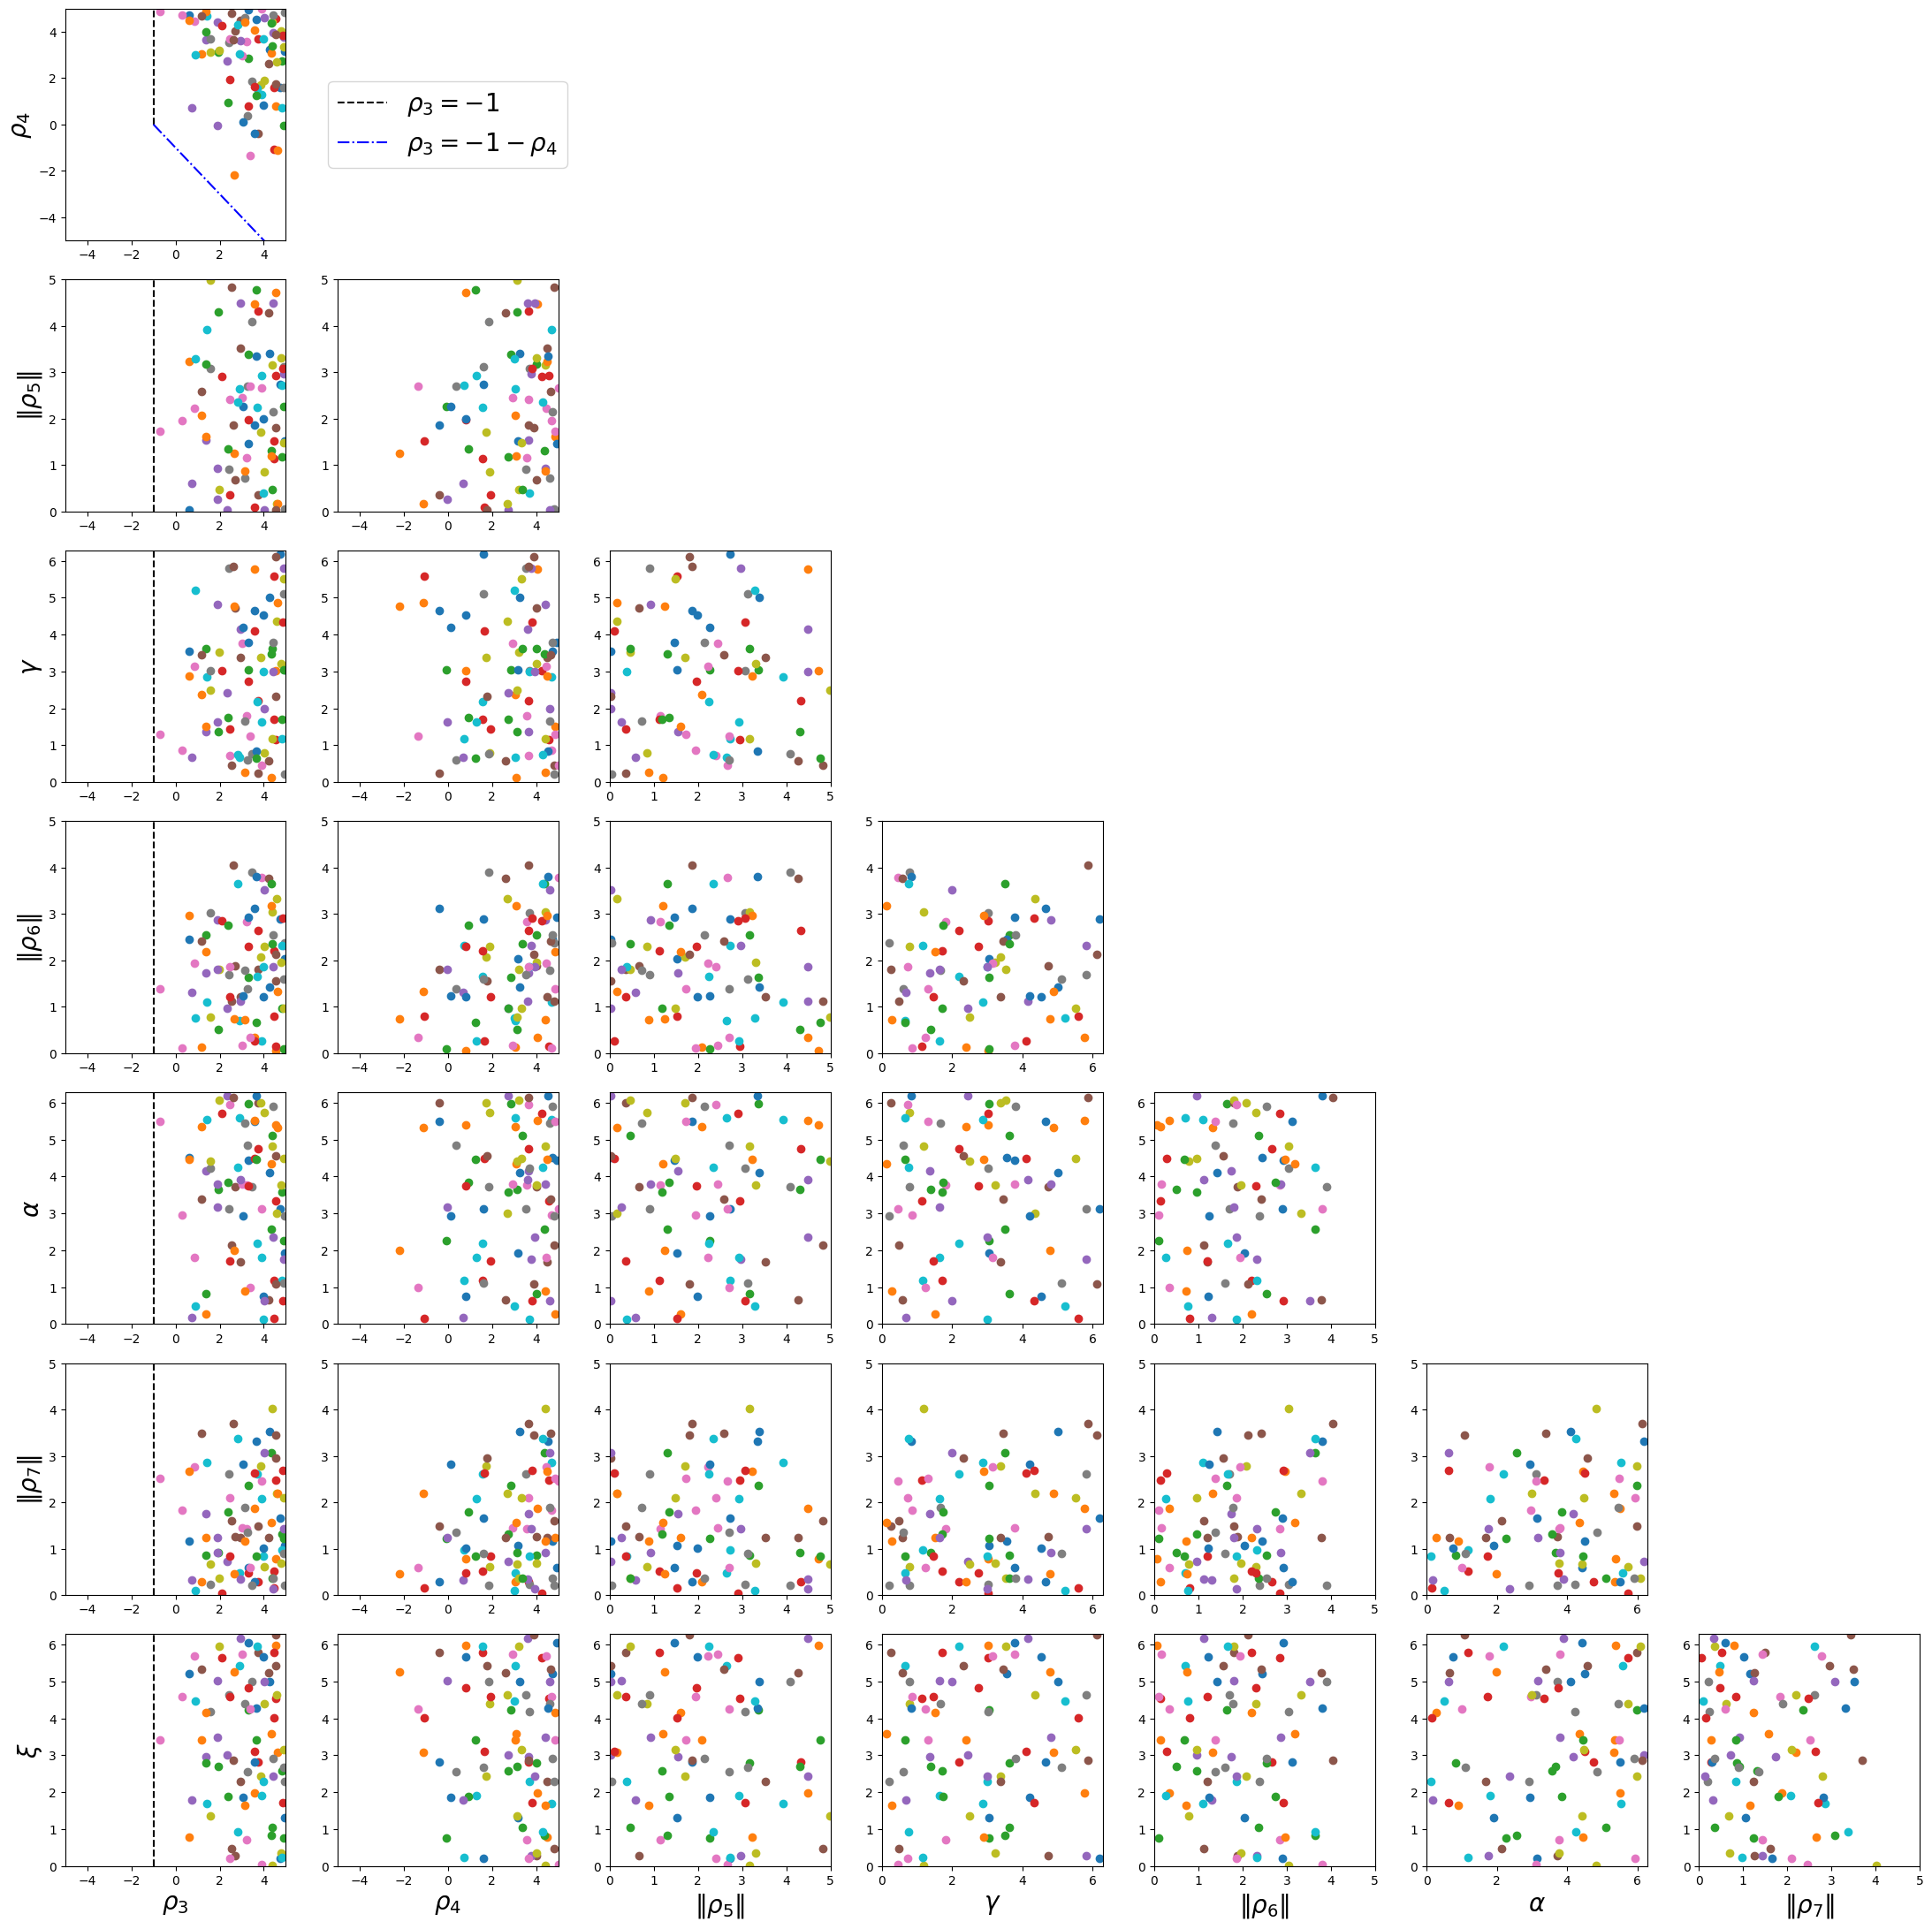

In [73]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][6], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [74]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [75]:
# Extend the limits in order to explore Z_2-violating 2HDM results with rho_3<-1

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-10,10,dim)
rho_5 = np.random.default_rng().uniform(0,10,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,10,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,10,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


# Symmetric 2HDM potential 

In [76]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
rho_7 = rho_6
xi = alpha
#
symmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
symmetric_valid_values

[[4.722711198460361,
  3.6414067003825465,
  3.7616862002261775,
  0.025334804325938036,
  1.1308492862654984,
  4.005825853384166,
  1.1308492862654984,
  4.005825853384166,
  1.7500945821539995],
 [2.458128376852539,
  3.3259698892558465,
  1.2749719521994596,
  2.0362020409289774,
  2.0383790646199955,
  4.7079019630274,
  2.0383790646199955,
  4.7079019630274,
  1.1819095530696235],
 [0.6022623527657736,
  1.0296123159733472,
  1.5243840760172551,
  2.7609500144457146,
  0.763091573833804,
  1.1623989896628681,
  0.763091573833804,
  1.1623989896628681,
  0.6071102008114752],
 [2.938291356128987,
  4.82690551583816,
  0.919868653086387,
  2.385579489679371,
  0.7603816625919446,
  0.5252875536487884,
  0.7603816625919446,
  0.5252875536487884,
  1.9176194245152565],
 [2.6228661438767373,
  3.7717306815150735,
  0.48720736079903404,
  5.800212165046466,
  2.7500085217646024,
  5.236196407084662,
  2.7500085217646024,
  5.236196407084662,
  0.5878168841065361],
 [3.8478236699881023,


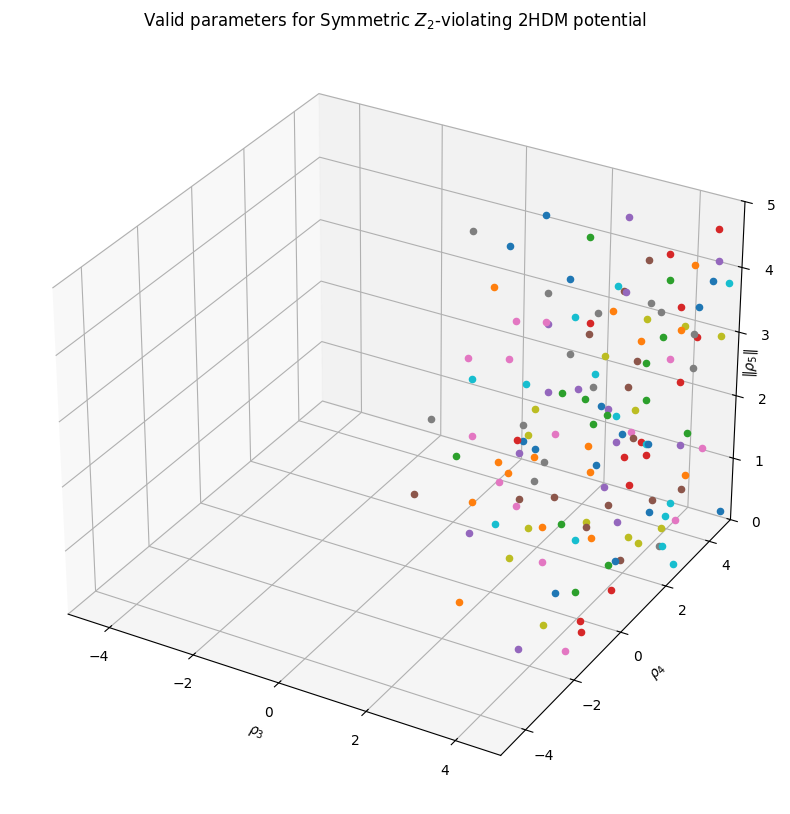

In [84]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Symmetric $Z_2$-violating 2HDM potential')

plt.show()

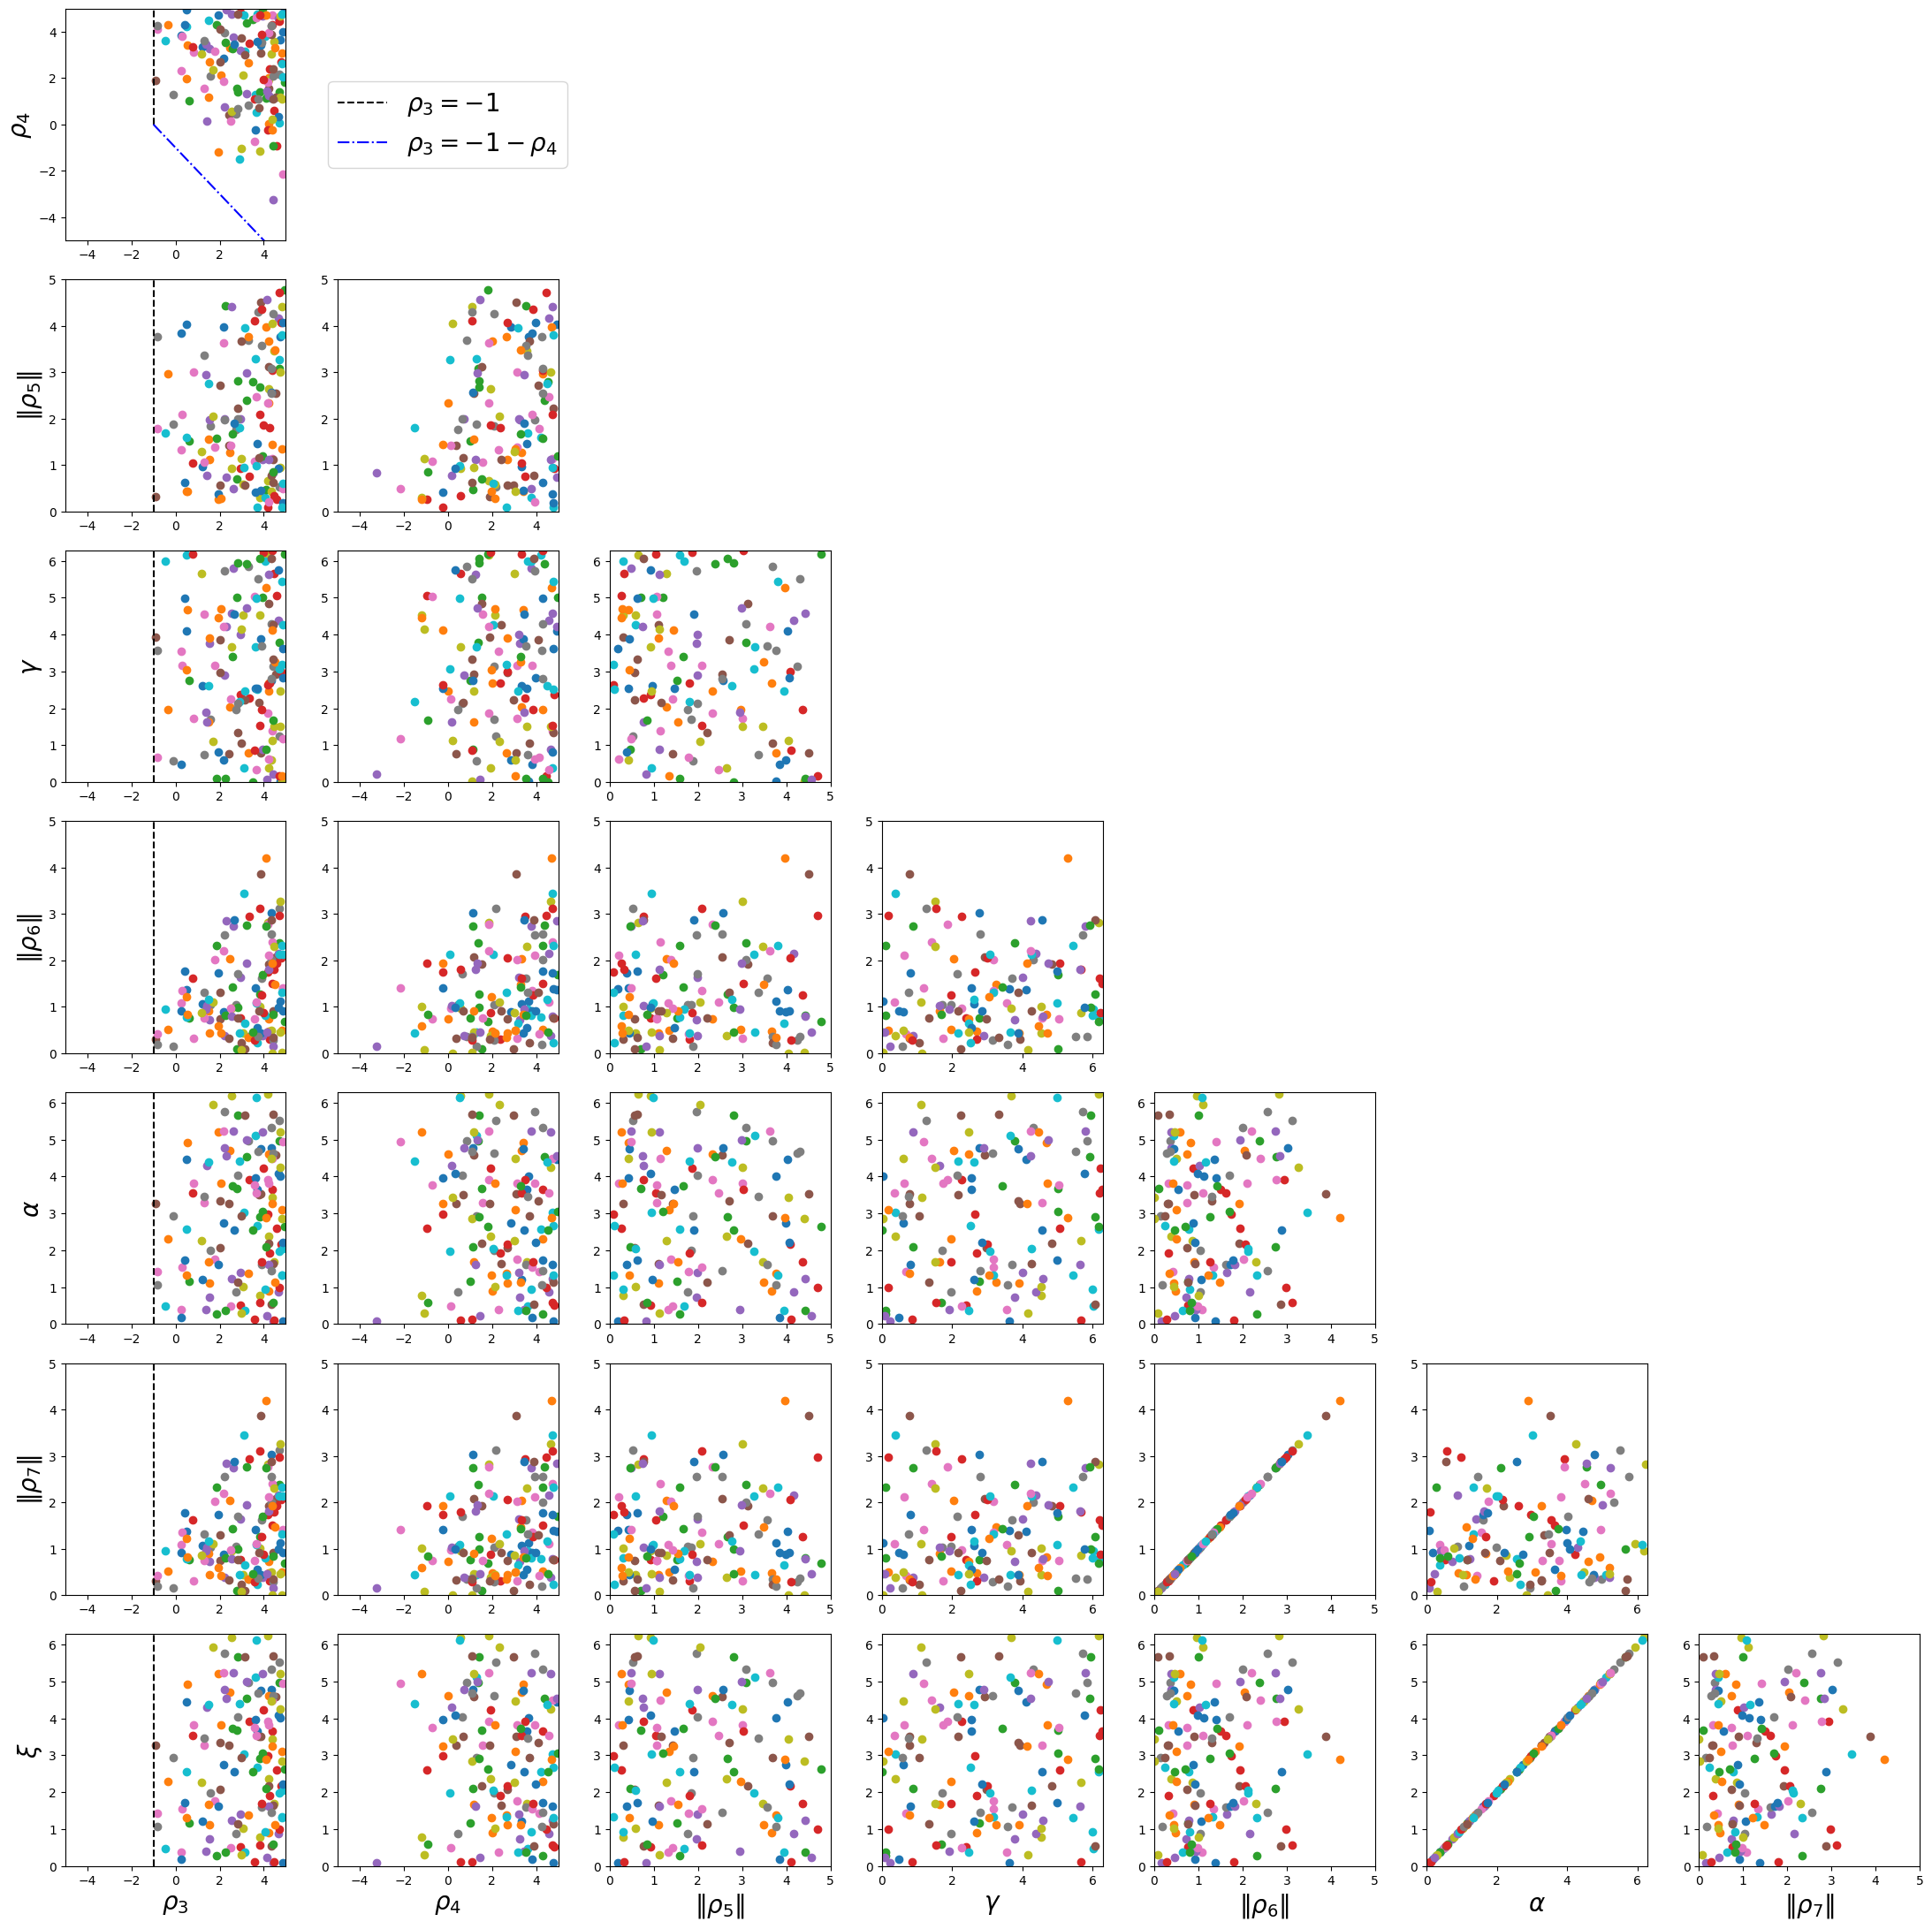

In [78]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][6], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

# Antisymmetric 2HDM potential

In [79]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and xi = alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
rho_7 = rho_6
xi = alpha + np.pi
#
antisymmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
antisymmetric_valid_values

[[3.5340437321191445,
  4.605512497765176,
  2.4073854075371153,
  0.7024660483134577,
  2.3335251616392365,
  0.2005337647915439,
  2.3335251616392365,
  3.342126418381337,
  1.4549497180142326],
 [2.3061258264541165,
  0.9431741004733087,
  3.19658871217905,
  5.468527982829311,
  0.6345823672764789,
  5.890255564739562,
  0.6345823672764789,
  9.031848218329355,
  1.0532822020394688],
 [2.7783242101128014,
  2.2324210939012286,
  3.061839113945995,
  0.8913328511923915,
  0.39719951546856924,
  1.1176187012446335,
  0.39719951546856924,
  4.259211354834426,
  1.9269895776302157],
 [2.4490698358880127,
  1.7198641607012979,
  1.4584882641360926,
  1.418265924725542,
  0.11249367049107506,
  0.5989006970729606,
  0.11249367049107506,
  3.740493350662754,
  2.0],
 [4.670391352640891,
  1.8215658681112892,
  4.543397484678956,
  3.6875523623046615,
  3.0010072254445577,
  1.9084652895193874,
  3.0010072254445577,
  5.050057943109181,
  1.161730058422902],
 [4.523986562136313,
  4.811005

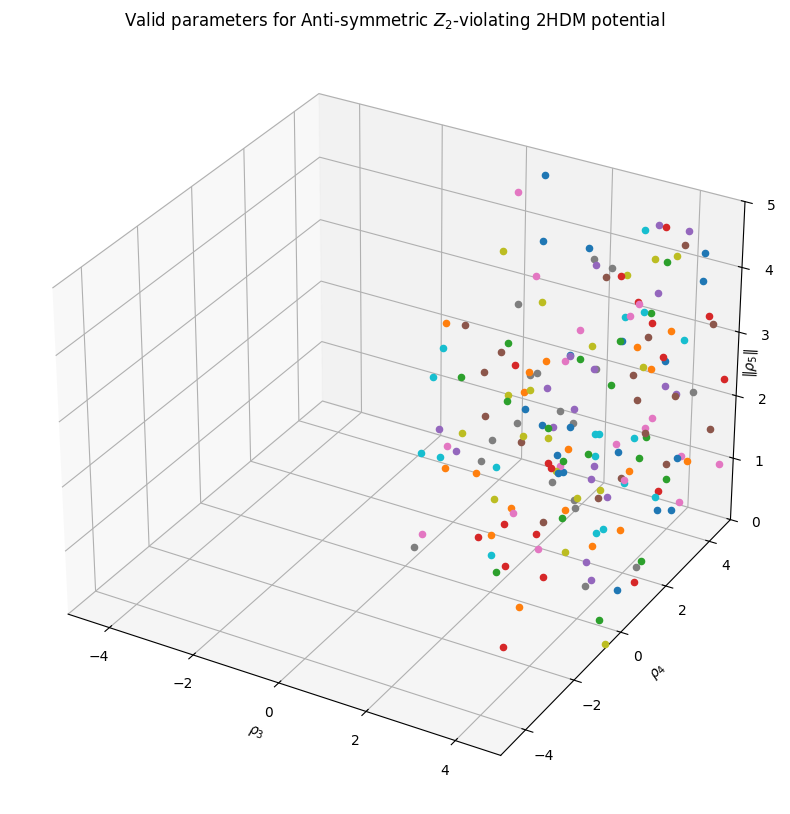

In [83]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Anti-symmetric $Z_2$-violating 2HDM potential')

plt.show()

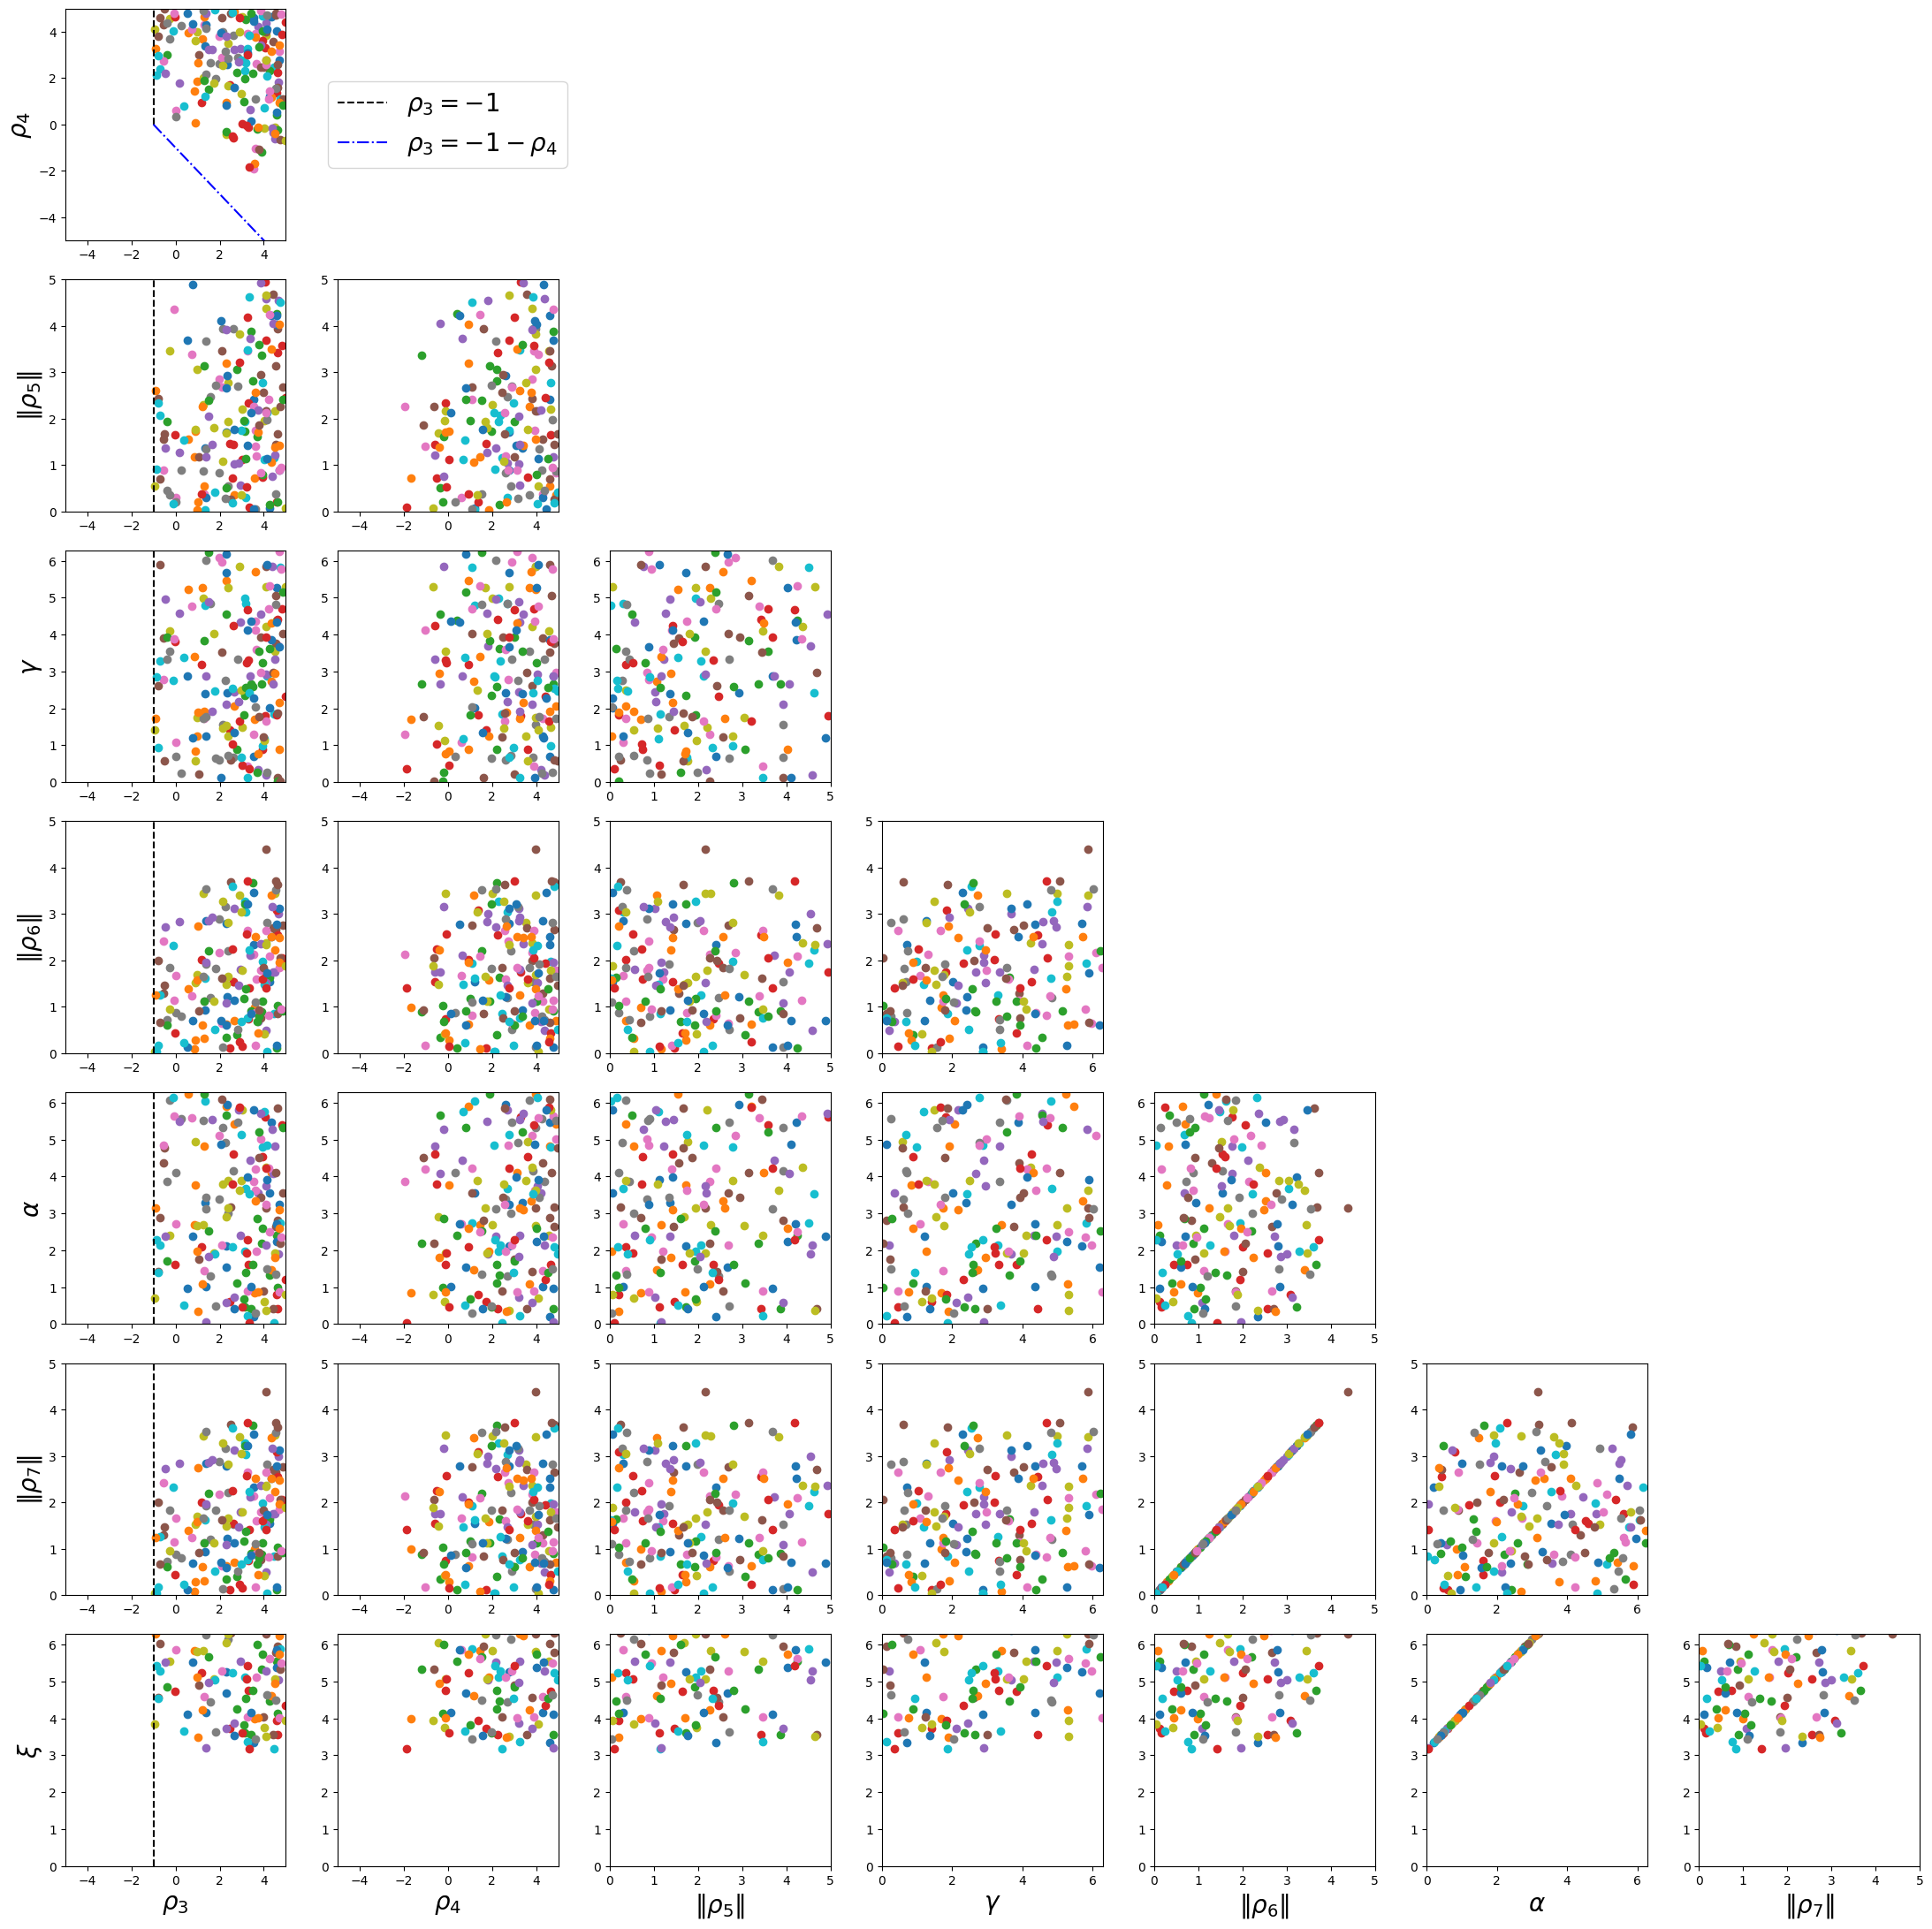

In [81]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][6], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()